# Homework 5 – Analysis of distributed data sources

In the dataset we already used in the exercise, there is another target attribute: `age`. Apply your learnings on this new target and assess the performance of each classifier.

1. Build and test a text classifier targeting the age of a user according their age classes (0-10, 11-20, 21-30, 31+).

2. Build a ML name classifier that classifies the age of a user according their age classes (0-10, 11-20, 21-30, 31+).

3. Build a meta classifier that combines the previously built classifiers based on their age classes (0-10, 11-20, 21-30, 31+).

As introduced in a previous homework, please save each classifier with the following command: `dump(tree_clf, 'clf1.joblib')`.<br/> Name them `clf1.joblib`, `clf2.joblib` and `clf3.joblib`. 


**Please make sure:**

- Each cell (essential step) is commented on with a short sentence
- New variables / fields are output in sufficient length (e.g., `df.head(10)`)
- Each of the tasks is answered with a short written statement
- Tidy up your code

There are no defined functions, we expect you to structure your code on your own (functions are not mandatory). Don't forget to upload the joblibs next to your notebook! 

<hr/>

## Coding Area

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as bayes
from sklearn.feature_extraction.text import CountVectorizer as countvec
from sklearn.ensemble import RandomForestClassifier 
from joblib import dump

In [2]:
data = pd.read_pickle('data/twitterData.pkl')
data.shape

(2916, 6)

In [39]:
# get age class by floor div e. g. 31 // 10 = 3
data['age_class'] = data['age'].floordiv(10)
data.head(20)

,screen_name,name,tweets_concatenated,avatar_url,gender,age,age_class
0,DatZerooo,David,Warum riecht mein Bruder nach Pizza wenn er ei...,http://pbs.twimg.com/profile_images/7569661512...,M,16.0,1.0
0,reap705,Oliver Gast,[CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...,http://pbs.twimg.com/profile_images/1366984169...,M,15.0,1.0
0,Dossary1995,Khalid Aldossary,,http://pbs.twimg.com/profile_images/4167523242...,M,37.0,3.0
0,eduUu06,eduUu,heut abend kogge und morgen endlich haare ab :...,http://pbs.twimg.com/profile_images/896480580/...,M,46.0,4.0
0,Narutofreak935,Avengar,@GrandlineTV gib nicht auf und mach dein Ding ...,http://pbs.twimg.com/profile_images/7317971734...,F,19.0,1.0
0,miley_sarah,Sarah,"RT @bomelino: Das ""Backe, backe Kuchen""-Lied i...",http://pbs.twimg.com/profile_images/7584397626...,M,18.0,1.0
0,DerIncubus,Der Incubus,@NicoleAllm Na ... gut ins neue Jahr gestartet...,http://pbs.twimg.com/profile_images/5808649200...,F,22.0,2.0
0,Petouser,ペトユサ (Petoyusa),Verschwörungstheorie: Pokemon Go wird von der ...,http://pbs.twimg.com/profile_images/6626943925...,M,26.0,2.0
0,ChrisWhite126,Chris White,Ach du scheiße ist das warm. :( Hab locker 5kg...,http://pbs.twimg.com/profile_images/6463341220...,M,37.0,3.0
0,MusicFreakFever,Nadine (:,Heute nur DREI (!) Schulstunden !\n Ich LIIIIE...,http://pbs.twimg.com/profile_images/3788000003...,M,15.0,1.0


In [14]:
data['age'].isna().sum()

1607

In [15]:
data = data[data['age_class'].notna()]
data.shape

(1309, 7)

<AxesSubplot:>

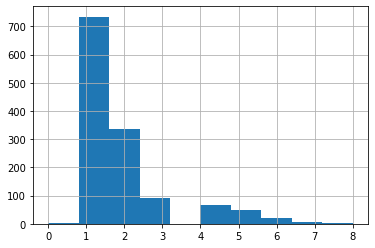

In [16]:

data['age_class'].hist()

In [17]:
train_sub, temp = train_test_split(data, test_size=0.4, random_state=42)
train_meta, test = train_test_split(temp, test_size=0.4, random_state=42)
print(train_sub.shape, train_meta.shape, test.shape)

(785, 7) (314, 7) (210, 7)


In [18]:
train_sub_tweets = train_sub['tweets_concatenated']
train_meta_tweets = train_meta['tweets_concatenated']
test_tweets = test['tweets_concatenated']

train_sub_names = train_sub['name']
train_meta_names = train_meta['name']
test_names = test['name']

In [19]:
y_train_sub = train_sub['age_class']
y_train_meta = train_meta['age_class']
y_test = test['age_class']

In [20]:
train_sub_tweets.head(10)

0    🙊❤️ #squirrel #washingtondc https://t.co/o0HOG...
0    @zaraoek  ohh bist auch in Twitter 😁||Was woll...
0    Wo bist du im Moment? — in der Schule -_- http...
0    @denisekhnemann Wann kam Mila?  Wie lange muss...
0                                                     
0    @dagibeee ach dagi ist echt scheiße aber du mu...
0                                                     
0    läuft ne :D j'ai pas le courage de te le dire ...
0                                                     
0                                                     
Name: tweets_concatenated, dtype: object

In [21]:
y_train_sub.head(4)

0    2.0
0    1.0
0    1.0
0    1.0
Name: age_class, dtype: float64

In [22]:
countvectorizer_tweets = countvec()
x_train_sub_tweets = countvectorizer_tweets.fit_transform(train_sub_tweets)
x_train_meta_tweets = countvectorizer_tweets.transform(train_meta_tweets)
x_test_tweets = countvectorizer_tweets.transform(test_tweets)

In [23]:
pd.DataFrame(x_train_sub_tweets.todense(), columns=countvectorizer_tweets.get_feature_names())

C:\Users\Markus\anaconda3\envs\aiss\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000bürger,000er,000ghmezhk,000km,000mal,000ster,001,002,...,민호생일축하해,백치,빅스,생일축하해,안돼,야채전,임윤아생일축하해,진짜,ﾟдﾟ,𖤐𖤐𖤐
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,8,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# train bayes clf on tweets

bayes_tweets = bayes()
bayes_tweets.fit(x_train_sub_tweets, y_train_sub)
tweet_score = bayes_tweets.score(x_test_tweets, y_test)

In [25]:
# dump clf as required
dump(bayes_tweets, 'clf1.joblib') 

['clf1.joblib']

In [26]:
tweet_score_text = f"Tweet Score is {tweet_score:0.2%}"
print(tweet_score_text)

Tweet Score is 56.19%


In [27]:
# stack input for later use in meta clf
stacked_input_1 = pd.Series(bayes_tweets.predict(x_train_meta_tweets))
stacked_input_1_test = pd.Series(bayes_tweets.predict(x_test_tweets))

## Name classifier

In [28]:
# apply count vectorizer to names 

cvectorizer_names = countvec()
x_train_sub_names = cvectorizer_names.fit_transform(train_sub_names)

x_train_meta_names = cvectorizer_names.transform(train_meta_names)
x_test_names = cvectorizer_names.transform(test_names)

In [29]:
# train bayes clf
bayes_names = bayes()
bayes_names.fit(x_train_sub_names, y_train_sub)

MultinomialNB()

In [30]:
name_score = bayes_names.score(x_test_names, y_test)
name_score_text = f"Name Score is {name_score:0.2%}"
print(name_score_text)

Name Score is 55.71%


In [31]:
# dump bayes clf as required
dump(bayes_names, 'clf2.joblib') 

['clf2.joblib']

In [32]:
# stack input for later use in meta clf
stacked_input_2 = pd.Series(bayes_names.predict(x_train_meta_names))
stacked_input_2_test = pd.Series(bayes_names.predict(x_test_names))

## Meta Classifier

In [33]:
# initialize RF classifier
forest = RandomForestClassifier()

In [34]:
# compose meta results for training
meta_data_train = {'input_1': stacked_input_1, 'input_2': stacked_input_2}
meta_data_train = pd.DataFrame(meta_data_train)

meta_data_train.head(10)

,input_1,input_2
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [35]:
# compose meta results for testing
meta_data_test = {'input_1': stacked_input_1_test, 'input_2': stacked_input_2_test}
meta_data_test = pd.DataFrame(meta_data_test)
forest.fit(meta_data_train, y_train_meta)

RandomForestClassifier()

In [36]:
meta_score = forest.score(meta_data_test, y_test)
meta_score_text = f"Meta Score is {meta_score:0.2%}"

In [37]:
# dump clf as required
dump(forest, 'clf3.joblib') 

['clf3.joblib']

In [38]:
# final comparsion
print(tweet_score_text)
print(name_score_text)
print(meta_score_text)

Tweet Score is 56.19%
Name Score is 55.71%
Meta Score is 55.71%
